In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns
from datetime import date
import yfinance as yf
from datetime import datetime, timedelta

Los activos son los activos obtenidos de la causalidad de granger de  las libretas de:

* https://github.com/FernandoMoralesM01/GC_Portfolio/blob/main/Notebooks/Model/Bi-LSTM.ipynb
* https://github.com/FernandoMoralesM01/GC_Portfolio/blob/main/Notebooks/Model/LSTM%2BTransformers.ipynb

In [7]:
df_rasgos = pd.DataFrame()



activos =  ['KOFUBL.MX', 'OMAB.MX', 'GM.MX', 'C.MX', 'SNYN.MX', 'BBVA.MX', 'NOKN.MX', 'VODN.MX', 
            'TEVAN.MX', 'BBN.MX', 'PBRN.MX', 'TLEVISACPO.MX', 'AMXB.MX', 'GRUMAB.MX', 'CEMEXCPO.MX', 
            'FRES.MX', 'ABEVN.MX', 'CIGN.MX', 'ALFAA.MX', 'AC.MX', 'AXTELCPO.MX', 'RA.MX', 'BIMBOA.MX',
              'BOLSAA.MX', 'CIEB.MX', 'FEMSAUB.MX', 'GENTERA.MX', 'ARA.MX', 'CYDSASAA.MX', 'FINDEP.MX', 
              'GFNORTEO.MX', 'FEMSAUBD.MX', 'FRAGUAB.MX', 'GBMO.MX', 'LABB.MX', 'GMEXICOB.MX', 'CHDRAUIB.MX',
                'VASCONI.MX', 'HERDEZ.MX', 'CUERVO.MX', 'Q.MX']


n = len(activos)

today = date.today()
start = today - timedelta(days=500)

print(today)

for i in activos:
    df_rasgos[i] = pd.DataFrame(yf.Ticker(i).history(start = start,end = today, )['Close'])
    df_rasgos[i] = (df_rasgos[i] - df_rasgos[i].mean()) / df_rasgos[i].std()
df_rasgos.head(2)
df_rasgos.fillna(method='ffill', inplace=True)
df_rasgos.fillna(method='bfill', inplace=True)


2025-01-10


C:\Users\fercy\AppData\Local\Temp\ipykernel_6104\1163618677.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_rasgos.fillna(method='ffill', inplace=True)
C:\Users\fercy\AppData\Local\Temp\ipykernel_6104\1163618677.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_rasgos.fillna(method='bfill', inplace=True)


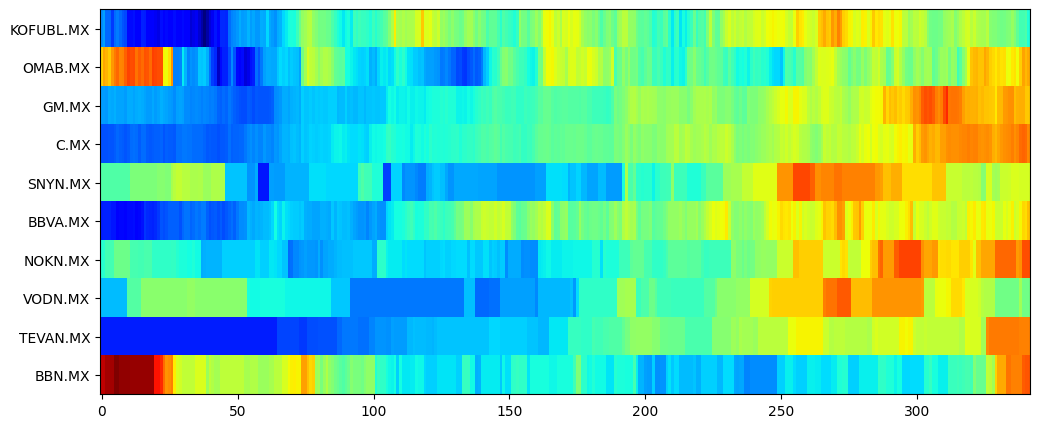

In [8]:
plt.figure(figsize = (12,5))
df_rasgos = df_rasgos.iloc[:, :10]
plt.imshow(df_rasgos.T, cmap='jet', interpolation='nearest', aspect='auto')
plt.yticks(range(len(df_rasgos.columns)), df_rasgos.columns);

In [10]:
from tensorflow.keras.models import load_model


In [73]:
LSTMpTrans = load_model('model/LSTMpTransformers.keras')
BiLSTM = load_model('model/Bi-LSTM.keras')

In [76]:
def calcula_rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

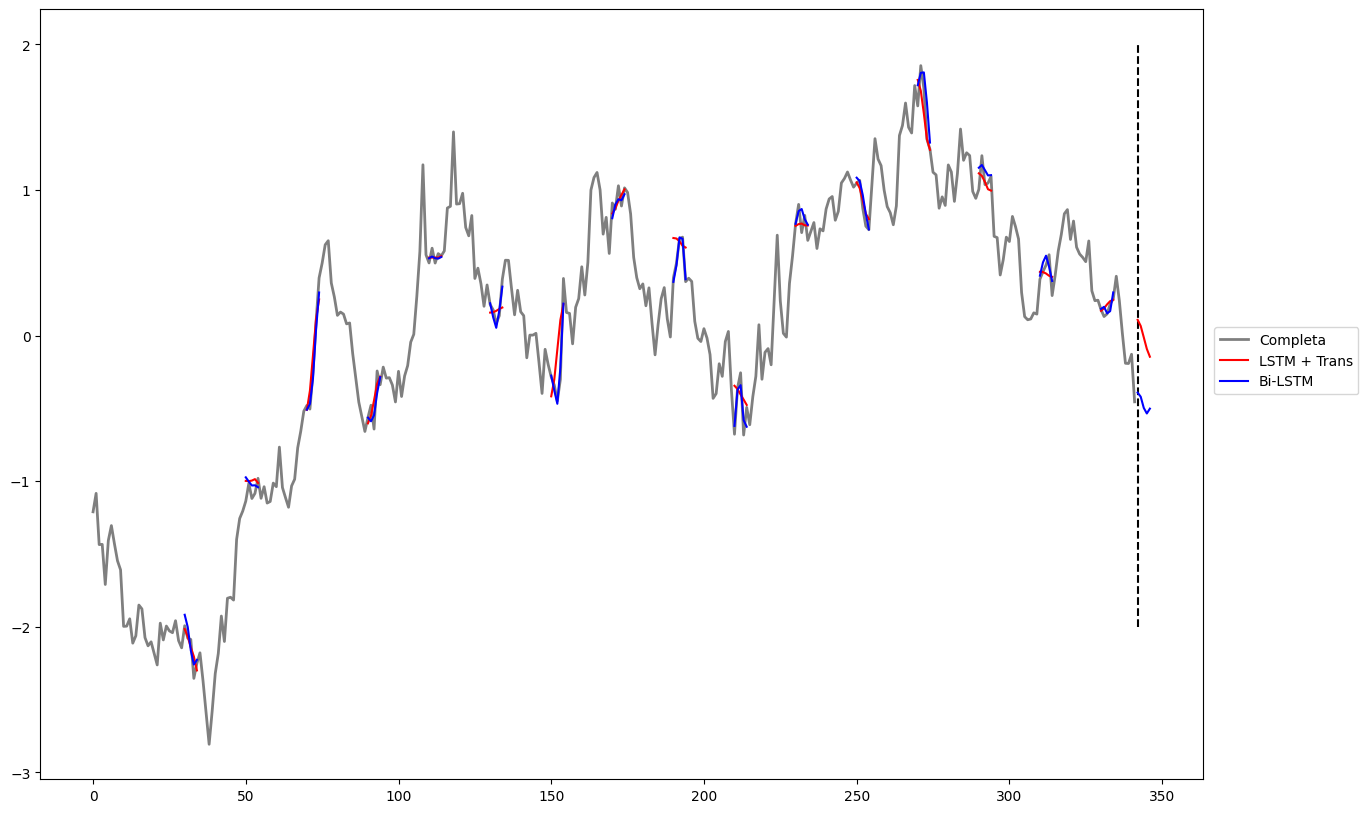

In [87]:
LSTM_trans_rmse = []
BiLSTM_rmse = []

completa = df_rasgos.values[:, 0]
n = np.arange(0, completa.shape[0], 1)

plt.figure(figsize = (15,10))
plt.plot(n, completa, label='Completa', color='black', linewidth=2, alpha=0.5)

for i in range (30, completa.shape[0], 20):
    sub_n = np.arange(i, i + 5, 1)
    X = df_rasgos.values[i - 30:i, :].reshape(1, 30, 10)
    y = completa[i:i + 5]
    y_LSTMtrans = LSTMpTrans.predict(X).reshape(5)
    y_BiLSTM = BiLSTM.predict(X).reshape(5)

    plt.plot(sub_n, y_LSTMtrans, color='red')
    plt.plot(sub_n, y_BiLSTM, color='blue')

    LSTM_trans_rmse.append(calcula_rmse(y, y_LSTMtrans))
    BiLSTM_rmse.append(calcula_rmse(y, y_BiLSTM))

plt.vlines(completa.shape[0], -2, 2, color='black', linestyle='--')
X = df_rasgos.values[-30:].reshape(1, 30, 10)


y_BiLSTM = BiLSTM.predict(X).reshape(5)
y_LSTMtrans = LSTMpTrans.predict(X).reshape(5)
plt.plot(np.arange(completa.shape[0], completa.shape[0] + 5, 1), y_LSTMtrans,label='LSTM + Trans', color='red')
plt.plot(np.arange(completa.shape[0], completa.shape[0] + 5, 1), y_BiLSTM, label='Bi-LSTM', color='blue')

plt.legend(loc = [1.01, 0.5])


In [84]:
print("\n***************************************************\n \t\tRMSE \n***************************************************\n")
print("LSTM + Trans \t | ", np.mean(np.array(LSTM_trans_rmse)))
print("Bi-LSTM \t | ", np.mean(np.array(BiLSTM_rmse)))


***************************************************
 		RMSE 
***************************************************

LSTM + Trans 	 |  0.1083227029770445
Bi-LSTM 	 |  0.07164827511962304
